<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a los datos

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [3]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [4]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en galones por milla) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo.

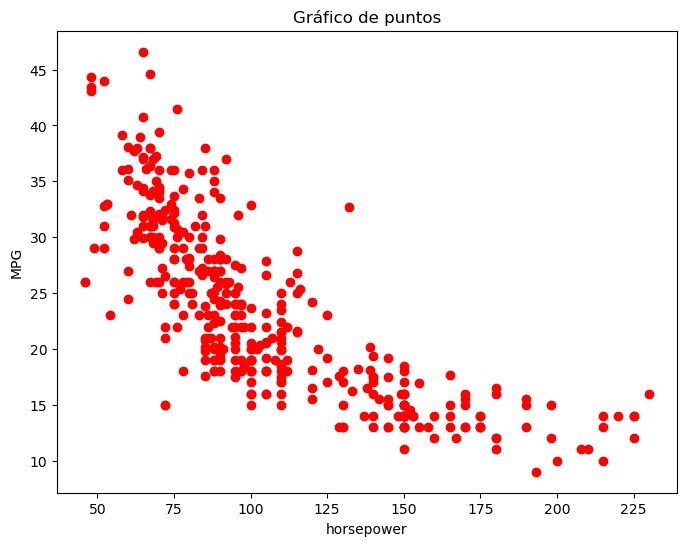

In [5]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    # TODO dibuja la gráfica
    
    plt.figure(figsize=(8, 6))        
    plt.scatter(df[nombre_columna],y['mpg'],c='red')
    plt.xlabel(nombre_columna)
    plt.ylabel('MPG')
    plt.title('Gráfico de puntos')
    plt.show()    

visualiza(X, y, 'horsepower')

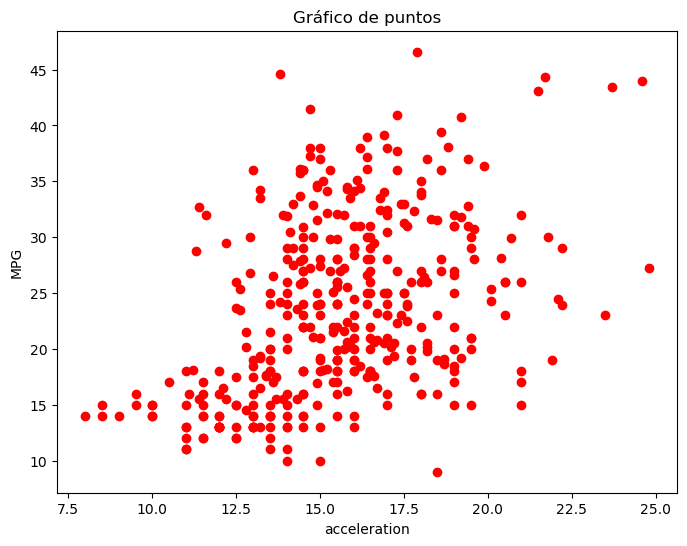

In [6]:
visualiza(X, y, 'acceleration')

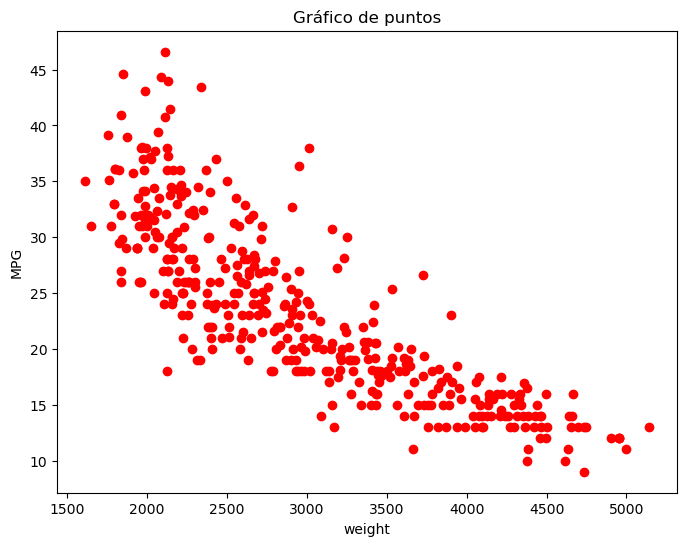

In [7]:
visualiza(X, y, 'weight')


Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [8]:
import numpy as np

def pesos_ols(X, y):
    # Implementa la fórmula matricial
    
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así
    num_filas,num_columnas=X.shape
    A=X
    if num_filas<num_columnas:       
        print("Número de observaciones < Número de variables")        
        A=X.T
    print("Dimensiones de la matriz adecuada",A.shape)  
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 
    ones = np.ones((len(A),1))
    print("Dimensiones de unos",ones.shape)
    A_b = np.concatenate((ones, A), axis = 1)
    print("Dimensiones de la matriz concatenada con unos 'A_b'",A_b.shape)    
    A_bt=A_b.T
    print("Dimensiones de la transpuesta 'A_bt'",A_bt.shape) 
    print("Dimensiones de  'y'",y.shape)   

    # TODO 3 Calcula los pesos

    w = np.linalg.inv(np.dot(A_bt, A_b)).dot(A_bt).dot(y)
    return w

In [9]:
A = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])

pesos_ols(A, y)

Número de observaciones < Número de variables
Dimensiones de la matriz adecuada (10, 2)
Dimensiones de unos (10, 1)
Dimensiones de la matriz concatenada con unos 'A_b' (10, 3)
Dimensiones de la transpuesta 'A_bt' (3, 10)
Dimensiones de  'y' (10,)


array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

Vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

In [10]:
# TODO Aplica el modelo 

X = auto_mpg.data.features 
y = auto_mpg.data.targets

# Escalamos la variable x 
X_np = np.array(X[['weight']])
y_np = np.array(y['mpg'])
X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

w = pesos_ols(X_gd, y_gd)
print(f"Punto de corte: {w[0]}\nPendiente:{w[1]}")

Dimensiones de la matriz adecuada (398, 1)
Dimensiones de unos (398, 1)
Dimensiones de la matriz concatenada con unos 'A_b' (398, 2)
Dimensiones de la transpuesta 'A_bt' (2, 398)
Dimensiones de  'y' (398,)
Punto de corte: 23.514572864321607
Pendiente:-6.492702022678119


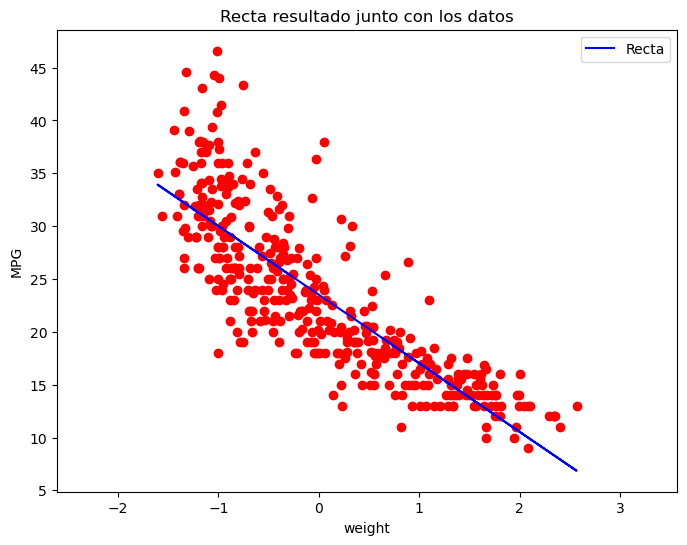

In [11]:
#Dibuja la recta junto con los datos

x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1
y1 = w[0] + w[1]*X_gd

plt.figure(figsize=(8, 6))        
plt.scatter(X_gd,y_gd,c='red')
plt.plot(X_gd, y1, c='blue', label = 'Recta')
plt.xlabel('weight')
plt.ylabel('MPG')
plt.title('Recta resultado junto con los datos')
plt.legend()
plt.xlim(x_min,x_max)
plt.show()    

Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función

In [12]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets
 
# Escalamos la variable x 
X_lr = X[['weight']]
X_gd=(X_lr - X_lr.mean()) / X_lr.std()
y_lr = y

# Entrenamos con los datos
lr.fit(X_gd,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [23.51457286]
Pendiente: [[-6.50087409]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

In [13]:
# Observamos que los datos son equivalentes
print("Dif de los  'Puntos de corte' con los dos métodos: ",(w[0]) - (lr.intercept_[0]))
print("Dif de las 'Pendientes' con los dos métodos: ",(w[1]) - (lr.coef_[0][0],))

Dif de los  'Puntos de corte' con los dos métodos:  0.0
Dif de las 'Pendientes' con los dos métodos:  [0.00817206]


### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



El método de mínimos cuadrados es más sencillo de implementar y computacionalmente más eficiente, en términos de precisión  es la solución óptima, pero es sensible a valores atípicos en los datos y éstos pueden afectar significativamente la solución final.

El descenso de gradiente es más escalable a conjuntos de datos grandes, ya que no requiere calcular la matriz inversa como en el método de mínimos cuadrados.

El descenso de gradiente puede tardar más en converger a la solución óptima, especialmente si no se elige adecuadamente la tasa de aprendizaje, pero es más robusto a la presencia de valores atípicos en los datos, ya que el impacto de estos se diluye a lo largo de las iteraciones.

La elección entre uno u otro método dependerá de las características y el tamaño del problema de regresión lineal que se esté abordando. si se tiene un conjunto de datos pequeño o mediano y se desea la mejor precisión posible, el método de mínimos cuadrados es la mejor opción. Si se tienen datos a gran escala y se requiere robustez a valores atípicos, o se desea abordar modelos más complejos, el descenso de gradiente es más apropiado, aunque puede ser computacionalmente más costoso.
 

## 2. Optimización con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la práctica, pero podéis hacerlo si queréis practicar más sobre el método del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [14]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta):     
    w = [w0]
    rss = [np.inf]
    w_iter = w0
    X_ones = np.concatenate((np.ones((len(X),1)),X), axis = 1)
    for i in range(n_iter):        
        y_hat = np.dot(X_ones, w_iter)
        error = (y_hat - y)
        rss_iter = (1/2)*np.dot(error.T, error) 
        grad_rss = np.dot(X_ones.T, error)         
        w_iter = w_iter - eta*grad_rss 
        w.append(w_iter)
        rss.append(rss_iter)        
    return np.array(w), np.array(rss_iter)

eta = 0.01
n_iter = 2000

np.random.seed(123)
w0 = np.random.rand(2).reshape(2,1)

y = np.array([20850, 181500, 223500, 140000, 250000]).reshape((5, 1)) # vector columna 
X = np.array([0.37020659, -0.48234664, 0.51483616,0.38352774, 1.29888065]).reshape(5, 1)

weights, loss = gradient_descent(X, y, w0, n_iter, eta)
print(weights[-1])

[[144025.36404453]
 [ 45908.09706527]]


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

Punto de corte:  [23.51457286]
Pendiente:  [-6.49270202]


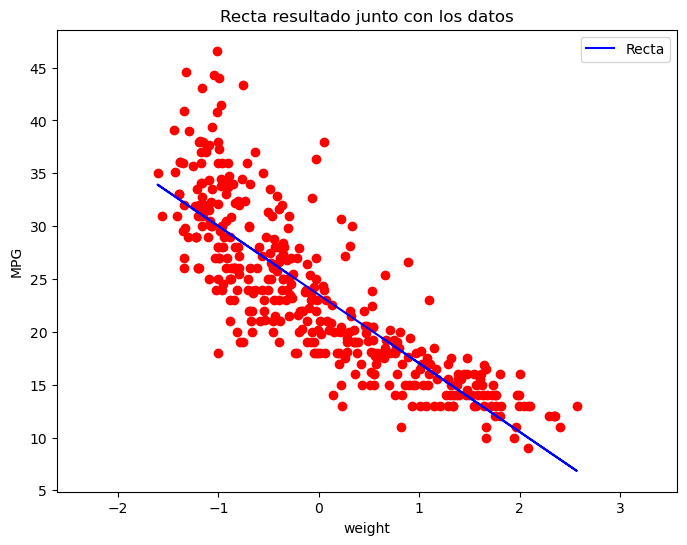

In [16]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate
w0 = np.array([[-2],[50]]).reshape((2, 1))
eta = 0.001
n_iter = 500

# TODO 2 Aplicamos el algoritmo
weights, loss = gradient_descent(X_gd, y_gd, w0, n_iter, eta)
print("Punto de corte: ",weights[-1][0])
print("Pendiente: ",weights[-1][1])

# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1

# TODO 3 Dibuja la gráfica
r=weights[-1]

y1 = r[0] + r[1]*X_gd

plt.figure(figsize=(8, 6))
plt.scatter(X_gd,y_gd,c='red')
plt.plot(X_gd, y1, c='blue', label = 'Recta')
plt.xlabel('weight')
plt.ylabel('MPG')
plt.title('Recta resultado junto con los datos')
plt.legend()
plt.xlim(x_min,x_max)
plt.show()    

In [23]:
print("Punto de corte con mínimos cuadrados:      ",w[0])
print("Punto de corte con descenso del gradiente: ",weights[-1][0])
print("Pendiente con mínimos cuadrados:           ",w[1])
print("Pendiente con descenso del gradiente:      ",weights[-1][1])

Punto de corte con mínimos cuadrados:       23.514572864321607
Punto de corte con descenso del gradiente:  [23.51457286]
Pendiente con mínimos cuadrados:            -6.492702022678119
Pendiente con descenso del gradiente:       [-6.49270202]
